In [1783]:
import cv2
import numpy as np
from math import ceil

filename = '01.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
im = cv2.GaussianBlur(img,(7,7),0)

low_threshold = 30
high_threshold = 50
edges = cv2.Canny(gray, low_threshold, high_threshold)
median = cv2.medianBlur(edges, 3)
avg = cv2.blur(median, (9,9))
candidate = np.int16(edges) - np.int16(avg)
candidate = cv2.threshold(candidate, 240, 255, cv2.THRESH_BINARY)[1]

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
#img[dst>0.01*dst.max()]=[0,0,255]
Y = np.array((0, 255, 255))
Y = np.int16(Y)
W = np.array((255, 255, 255))
W = np.int16(W)
dist1 = 0
dist2 = 0
d1 = []
d2 = []
using = []    # > np.percentile(dst, 50)
x, y = np.where(dst > 9)
for i in range(len(x)):
    if  candidate[x[i], y[i]] == 255:
        B = im[x[i], y[i], 0]
        G = im[x[i], y[i], 1]
        R = im[x[i], y[i], 2]
        color = np.array((B, G, R))
        dist1 = np.linalg.norm(Y-color)
        dist2 = np.linalg.norm(W-color)
        '''
        if x[i] > ceil(dst.shape[0]/2):
            dist1 /= 2
            dist2 /= 2      
        '''
        if (dist2 < 50) | (dist1 < 100):
            using.append((x[i], y[i]))
            d1.append(dist1)
            d2.append(dist2)
    
if (len(d1) < 300) | (len(d2) < 300):
    print('lack')
    dist1 = 0
    dist2 = 0
    d1 = []
    d2 = []
    using = []    # > np.percentile(dst, 50)
    x, y = np.where(dst > 9)
    for i in range(len(x)):
        if  candidate[x[i], y[i]] == 255:
            B = im[x[i], y[i], 0]
            G = im[x[i], y[i], 1]
            R = im[x[i], y[i], 2]
            color = np.array((B, G, R))
            dist1 = np.linalg.norm(Y-color)
            dist2 = np.linalg.norm(W-color)
            if x[i] > ceil(dst.shape[0]/2):
                dist1 /= 2
                dist2 /= 2     
            if (dist2 < 50) | (dist1 < 200):
                using.append((x[i], y[i]))
                d1.append(dist1)
                d2.append(dist2)

if sum(d1) > sum(d2):
    t = True
    col = d2
else:
    t = False
    col = d1
deleters = []
for i in np.where(col > np.percentile(col, 30))[0]:
    deleters.append(using[i])

print((len(using), len(deleters)))

for i in deleters:
    using.remove(i)

lack
(6102, 4254)


In [1784]:
print(sum(d1), end = '\n') # distance from Yellow 
print(sum(d2)) # distance from White 

803479.8102351454
918812.3327096185


In [1785]:
for x, y in using:
    cv2.circle(img, (y, x), 3, (0, 0, 255), -1)

cv2.imwrite('Y1.jpg', img)

True

In [1786]:
def direction(input, init):
    global boundary, initpt, dir, t
    t = []
    if dir:
        init = dir
    x, y = input
    if init%2 == 0:
        dir = (init + 7)%8
    else:
        dir = (init + 6)%8
    while len(t) < 8:
        if dir == 0:
            if homo((x, y), (x+1, y)) == True:
                initpt = (x+1, y)
                boundary.append((x+1, y))
                break
            else:
                print((x, y), (x+1, y))
                t.append(0)
                dir = 1
        elif dir == 1:
            if homo((x, y), (x+1, y+1)) == True:
                initpt = (x+1, y+1)
                boundary.append((x+1, y+1)) 
                break
            else:
                print((x, y), (x+1, y+1))
                t.append(1)
                dir = 2
        elif dir == 2:
            if homo((x, y), (x, y+1)) == True:
                initpt = (x, y+1)
                boundary.append((x, y+1))  
                break
            else:
                print((x, y), (x, y+1))
                t.append(2)
                dir = 3       
        elif dir == 3:
            if homo((x, y), (x-1, y+1)) == True:
                initpt = (x-1, y+1)
                boundary.append((x-1, y+1))   
                break
            else:
                print((x, y), (x-1, y+1))
                t.append(3)
                dir = 4
        elif dir == 4:
            if homo((x, y), (x-1, y)) == True:
                initpt = (x-1, y)
                boundary.append((x-1, y))
                break
            else:
                print((x, y), (x-1, y))
                t.append(4)
                dir = 5
        elif dir == 5:
            if homo((x, y), (x-1, y-1)) == True:
                initpt = (x-1, y-1)
                boundary.append((x-1, y-1))
                break
            else:
                print((x, y), (x-1, y-1))
                t.append(5)
                dir = 6
        elif dir == 6:
            if homo((x, y), (x, y-1)) == True:
                initpt = (x, y-1)
                boundary.append((x, y-1))
                break
            else:
                print((x, y), (x, y-1))
                t.append(6)
                dir = 7  
        elif dir == 7:
            if homo((x, y), (x+1, y-1)) == True:
                initpt = (x+1, y-1)
                boundary.append((x+1, y-1))
                break
            else:
                print((x, y), (x+1, y-1))
                t.append(7)
                dir = 0  

                
def homo(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    if (x2 >= gray.shape[0]) | (y2 >= gray.shape[1]):
        return False
    else:
        B = im[x1, y1, 0]
        G = im[x1, y1, 1]
        R = im[x1, y1, 2]
        b = im[x2, y2, 0]
        g = im[x2, y2, 1]
        r = im[x2, y2, 2]
        c1 = np.array((B, G, R))
        c2 = np.array((b, g, r))
        c1 = np.int16(c1)
        c2 = np.int16(c2)
        dist = np.sum(c2-c1)
        if sum(d1) > sum(d2):
            d = np.linalg.norm(W - im[x2, y2, :])
        else:
            d = np.linalg.norm(Y - im[x2, y2, :])
        if (dist > -30) & (d < np.percentile(col, 90)):
            return True
        else:
            return False

In [1787]:
d1 = []; d2 = []
for i in using:
    x, y = i
    B = im[x, y, 0]
    G = im[x, y, 1]
    R = im[x, y, 2]
    color = np.array((B, G, R))
    d1.append(np.linalg.norm(Y-color))
    d2.append(np.linalg.norm(W-color))
    
if sum(d1) > sum(d2):
    col = d2
else: 
    col = d1
    
    
boundary = []
d = 0
t2 = using.copy()
for i in range(len(using)): 
    initpt = using[i]
    d += 1
    tolerate = 0
    dir = 7
    while True:
        if initpt in t2:
            tolerate += 1
            if tolerate > 3:
                break
            else:
                direction(initpt, dir)
        else:
            t2.append(initpt)
            direction(initpt, dir)


(384, 131) (385, 130)
(385, 131) (386, 130)
(383, 196) (384, 197)
(383, 197) (384, 198)
(383, 198) (384, 199)
(383, 199) (384, 200)
(383, 200) (384, 201)
(383, 201) (384, 202)
(383, 202) (384, 203)
(384, 204) (385, 203)
(385, 204) (386, 203)
(386, 204) (387, 203)
(386, 204) (387, 204)
(387, 205) (388, 204)
(388, 205) (389, 204)
(389, 205) (390, 204)
(391, 204) (390, 203)
(391, 203) (390, 202)
(391, 203) (391, 202)
(392, 202) (391, 201)
(392, 202) (392, 201)
(393, 201) (392, 200)
(393, 200) (392, 199)
(393, 200) (393, 199)
(394, 199) (393, 198)
(394, 198) (393, 197)
(393, 196) (392, 197)
(393, 196) (392, 196)
(392, 195) (391, 196)
(392, 195) (391, 195)
(392, 195) (391, 194)
(391, 193) (390, 194)
(390, 193) (389, 194)
(388, 194) (389, 195)
(388, 194) (388, 195)
(387, 195) (388, 196)
(387, 195) (387, 196)
(386, 196) (387, 197)
(386, 197) (387, 198)
(386, 198) (387, 199)
(386, 199) (387, 200)
(386, 199) (386, 200)
(385, 200) (386, 201)
(385, 201) (386, 202)
(385, 202) (386, 203)
(386, 204)

(355, 270) (356, 269)
(356, 270) (357, 269)
(357, 270) (358, 269)
(357, 270) (358, 270)
(358, 271) (359, 270)
(359, 271) (360, 270)
(360, 271) (361, 270)
(361, 271) (362, 270)
(362, 271) (363, 270)
(363, 271) (364, 270)
(363, 271) (364, 271)
(363, 271) (364, 272)
(363, 272) (364, 273)
(363, 273) (364, 274)
(363, 274) (364, 275)
(363, 275) (364, 276)
(363, 276) (364, 277)
(363, 277) (364, 278)
(363, 278) (364, 279)
(363, 279) (364, 280)
(363, 280) (364, 281)
(363, 281) (364, 282)
(363, 282) (364, 283)
(363, 283) (364, 284)
(363, 283) (363, 284)
(363, 283) (362, 284)
(362, 283) (361, 284)
(361, 283) (360, 284)
(360, 283) (359, 284)
(359, 283) (358, 284)
(358, 283) (357, 284)
(357, 283) (356, 284)
(356, 283) (355, 284)
(355, 283) (354, 284)
(354, 283) (353, 284)
(353, 283) (352, 284)
(353, 283) (352, 283)
(352, 282) (351, 283)
(352, 282) (351, 282)
(352, 282) (351, 281)
(351, 280) (350, 281)
(351, 280) (350, 280)
(351, 280) (350, 279)
(351, 279) (350, 278)
(351, 278) (350, 277)
(350, 276)

(342, 368) (343, 369)
(342, 369) (343, 370)
(342, 370) (343, 371)
(342, 370) (342, 371)
(342, 372) (343, 371)
(342, 372) (343, 372)
(342, 372) (343, 373)
(342, 373) (343, 374)
(342, 374) (343, 375)
(342, 375) (343, 376)
(342, 376) (343, 377)
(343, 378) (344, 377)
(343, 378) (344, 378)
(343, 378) (344, 379)
(344, 380) (345, 379)
(344, 380) (345, 380)
(344, 380) (345, 381)
(344, 381) (345, 382)
(345, 383) (346, 382)
(345, 383) (346, 383)
(345, 383) (346, 384)
(346, 385) (347, 384)
(346, 385) (347, 385)
(347, 386) (348, 385)
(348, 386) (349, 385)
(348, 386) (349, 386)
(348, 386) (349, 387)
(349, 388) (350, 387)
(349, 388) (350, 388)
(349, 388) (350, 389)
(350, 390) (351, 389)
(350, 390) (351, 390)
(351, 391) (352, 390)
(352, 391) (353, 390)
(352, 391) (353, 391)
(353, 392) (354, 391)
(353, 392) (354, 392)
(353, 392) (354, 393)
(353, 393) (354, 394)
(353, 393) (353, 394)
(353, 393) (352, 394)
(351, 394) (352, 395)
(351, 395) (352, 396)
(352, 397) (353, 396)
(352, 397) (353, 397)
(352, 397)

(386, 249) (385, 250)
(385, 249) (384, 250)
(384, 249) (383, 250)
(383, 249) (382, 250)
(382, 249) (381, 250)
(381, 249) (380, 250)
(380, 249) (379, 250)
(379, 249) (378, 250)
(378, 249) (377, 250)
(377, 249) (376, 250)
(376, 249) (375, 250)
(375, 249) (374, 250)
(374, 249) (373, 250)
(373, 249) (372, 250)
(372, 249) (371, 250)
(371, 249) (370, 250)
(370, 249) (369, 250)
(369, 249) (368, 250)
(368, 249) (367, 250)
(367, 249) (366, 250)
(366, 249) (365, 250)
(365, 249) (364, 250)
(364, 249) (363, 250)
(363, 249) (362, 250)
(362, 249) (361, 250)
(361, 249) (360, 250)
(360, 249) (359, 250)
(359, 249) (358, 250)
(358, 249) (357, 250)
(357, 249) (356, 250)
(355, 250) (356, 251)
(355, 250) (355, 251)
(355, 250) (354, 251)
(354, 250) (353, 251)
(354, 250) (353, 250)
(353, 249) (352, 250)
(352, 249) (351, 250)
(351, 249) (350, 250)
(349, 250) (350, 251)
(349, 250) (349, 251)
(348, 251) (349, 252)
(348, 251) (348, 252)
(347, 252) (348, 253)
(348, 254) (349, 253)
(348, 254) (349, 254)
(348, 254)

(406, 87) (405, 86)
(406, 86) (405, 85)
(406, 85) (405, 84)
(406, 84) (405, 83)
(406, 83) (405, 82)
(406, 83) (406, 82)
(407, 82) (406, 81)
(407, 81) (406, 80)
(407, 80) (406, 79)
(407, 79) (406, 78)
(407, 78) (406, 77)
(407, 77) (406, 76)
(407, 76) (406, 75)
(407, 76) (407, 75)
(408, 75) (407, 74)
(408, 74) (407, 73)
(408, 73) (407, 72)
(408, 72) (407, 71)
(408, 71) (407, 70)
(408, 70) (407, 69)
(408, 69) (407, 68)
(408, 68) (407, 67)
(408, 67) (407, 66)
(408, 66) (407, 65)
(408, 65) (407, 64)
(408, 64) (407, 63)
(408, 63) (407, 62)
(408, 62) (407, 61)
(408, 61) (407, 60)
(408, 60) (407, 59)
(408, 60) (408, 59)
(409, 59) (408, 58)
(409, 58) (408, 57)
(409, 57) (408, 56)
(409, 57) (409, 56)
(409, 57) (410, 56)
(410, 57) (411, 56)
(411, 57) (412, 56)
(413, 56) (412, 55)
(413, 56) (413, 55)
(413, 54) (412, 55)
(412, 54) (411, 55)
(412, 54) (411, 54)
(411, 53) (410, 54)
(410, 53) (409, 54)
(410, 53) (409, 53)
(409, 52) (408, 53)
(409, 52) (408, 52)
(409, 52) (408, 51)
(409, 51) (408, 50)


(400, 310) (399, 311)
(399, 310) (398, 311)
(399, 310) (398, 310)
(398, 309) (397, 310)
(397, 309) (396, 310)
(396, 309) (395, 310)
(395, 309) (394, 310)
(394, 309) (393, 310)
(393, 309) (392, 310)
(393, 309) (392, 309)
(389, 710) (390, 711)
(389, 710) (389, 711)
(389, 710) (388, 711)
(388, 710) (387, 711)
(388, 710) (387, 710)
(387, 709) (386, 710)
(390, 112) (391, 113)
(390, 112) (390, 113)
(390, 112) (389, 113)
(390, 113) (391, 114)
(390, 113) (390, 114)
(389, 114) (390, 115)
(389, 115) (390, 116)
(389, 116) (390, 117)
(391, 214) (390, 215)
(390, 214) (389, 215)
(389, 214) (388, 215)
(392, 235) (391, 234)
(392, 235) (392, 234)
(392, 235) (393, 234)
(393, 235) (394, 234)
(394, 235) (395, 234)
(395, 235) (396, 234)
(396, 235) (397, 234)
(396, 235) (397, 235)
(396, 235) (397, 236)
(390, 308) (391, 309)
(390, 308) (390, 309)
(390, 308) (389, 309)
(389, 308) (388, 309)
(388, 308) (387, 309)
(387, 308) (386, 309)
(386, 308) (385, 309)
(386, 308) (385, 308)
(385, 307) (384, 308)
(385, 307)

(392, 587) (392, 586)
(393, 586) (392, 585)
(393, 585) (392, 584)
(393, 584) (392, 583)
(393, 583) (392, 582)
(393, 582) (392, 581)
(393, 582) (393, 581)
(394, 581) (393, 580)
(394, 581) (394, 580)
(394, 581) (395, 580)
(395, 581) (396, 580)
(396, 581) (397, 580)
(397, 581) (398, 580)
(396, 88) (397, 87)
(397, 88) (398, 87)
(398, 88) (399, 87)
(395, 98) (396, 99)
(395, 99) (396, 100)
(395, 100) (396, 101)
(395, 99) (396, 100)
(395, 100) (396, 101)
(396, 104) (397, 103)
(396, 105) (397, 104)
(397, 105) (398, 104)
(398, 105) (399, 104)
(399, 105) (400, 104)
(400, 105) (401, 104)
(401, 105) (402, 104)
(401, 105) (402, 105)
(401, 105) (402, 106)
(402, 107) (403, 106)
(404, 106) (403, 105)
(404, 106) (404, 105)
(396, 147) (397, 146)
(395, 214) (396, 215)
(395, 238) (396, 239)
(397, 258) (396, 257)
(397, 258) (397, 257)
(397, 258) (398, 257)
(397, 258) (398, 258)
(398, 259) (399, 258)
(398, 259) (399, 259)
(398, 259) (399, 260)
(398, 260) (399, 261)
(398, 260) (398, 261)
(397, 430) (396, 429

(422, 469) (422, 468)
(423, 468) (422, 467)
(423, 467) (422, 466)
(423, 466) (422, 465)
(423, 466) (423, 465)
(424, 465) (423, 464)
(424, 465) (424, 464)
(425, 464) (424, 463)
(425, 463) (424, 462)
(424, 461) (423, 462)
(424, 461) (423, 461)
(424, 461) (423, 460)
(424, 460) (423, 459)
(424, 459) (423, 458)
(424, 458) (423, 457)
(424, 457) (423, 456)
(424, 456) (423, 455)
(424, 455) (423, 454)
(423, 453) (422, 454)
(422, 453) (421, 454)
(421, 453) (420, 454)
(421, 453) (420, 453)
(420, 452) (419, 453)
(419, 452) (418, 453)
(419, 452) (418, 452)
(419, 452) (418, 451)
(418, 450) (417, 451)
(417, 450) (416, 451)
(417, 450) (416, 450)
(416, 449) (415, 450)
(416, 449) (415, 449)
(415, 448) (414, 449)
(415, 448) (414, 448)
(415, 448) (414, 447)
(415, 447) (414, 446)
(415, 446) (414, 445)
(415, 445) (414, 444)
(415, 444) (414, 443)
(415, 443) (414, 442)
(415, 442) (414, 441)
(415, 441) (414, 440)
(415, 441) (415, 440)
(415, 439) (414, 440)
(415, 439) (414, 439)
(415, 439) (414, 438)
(414, 437)

(411, 905) (410, 906)
(410, 905) (409, 906)
(409, 905) (408, 906)
(408, 905) (407, 906)
(408, 905) (407, 905)
(407, 904) (406, 905)
(407, 904) (406, 904)
(406, 903) (405, 904)
(406, 903) (405, 903)
(406, 903) (405, 902)
(406, 902) (405, 901)
(406, 901) (405, 900)
(406, 903) (405, 902)
(406, 902) (405, 901)
(406, 901) (405, 900)
(406, 904) (405, 903)
(406, 903) (405, 902)
(406, 902) (405, 901)
(407, 75) (406, 74)
(407, 75) (407, 74)
(408, 74) (407, 73)
(408, 73) (407, 72)
(407, 76) (406, 75)
(407, 76) (407, 75)
(408, 75) (407, 74)
(408, 74) (407, 73)
(406, 221) (405, 222)
(405, 221) (404, 222)
(404, 221) (403, 222)
(405, 238) (406, 239)
(405, 239) (406, 240)
(405, 240) (406, 241)
(405, 240) (405, 241)
(404, 241) (405, 242)
(404, 241) (404, 242)
(404, 241) (403, 242)
(403, 241) (402, 242)
(403, 241) (402, 241)
(403, 241) (402, 240)
(402, 239) (401, 240)
(402, 239) (401, 239)
(402, 239) (401, 238)
(402, 238) (401, 237)
(402, 237) (401, 236)
(402, 236) (401, 235)
(402, 236) (402, 235)
(403

(399, 180) (400, 181)
(399, 180) (399, 181)
(398, 181) (399, 182)
(398, 181) (398, 182)
(397, 182) (398, 183)
(397, 183) (398, 184)
(397, 184) (398, 185)
(397, 185) (398, 186)
(397, 186) (398, 187)
(397, 187) (398, 188)
(397, 188) (398, 189)
(397, 189) (398, 190)
(397, 190) (398, 191)
(397, 191) (398, 192)
(398, 193) (399, 192)
(398, 193) (399, 193)
(398, 193) (399, 194)
(411, 148) (412, 147)
(411, 148) (412, 148)
(411, 148) (412, 149)
(411, 149) (412, 148)
(411, 149) (412, 149)
(411, 149) (412, 150)
(410, 238) (411, 239)
(410, 238) (410, 239)
(410, 238) (409, 239)
(409, 238) (408, 239)
(412, 252) (411, 251)
(412, 252) (412, 251)
(412, 252) (413, 251)
(413, 252) (414, 251)
(414, 252) (415, 251)
(415, 252) (416, 251)
(416, 252) (417, 251)
(417, 252) (418, 251)
(418, 252) (419, 251)
(419, 252) (420, 251)
(419, 252) (420, 252)
(420, 253) (421, 252)
(420, 253) (421, 253)
(421, 254) (422, 253)
(421, 254) (422, 254)
(421, 254) (422, 255)
(421, 255) (422, 256)
(421, 256) (422, 257)
(422, 258)

(418, 423) (417, 424)
(418, 423) (417, 423)
(417, 422) (416, 423)
(416, 422) (415, 423)
(416, 422) (415, 422)
(416, 422) (415, 421)
(416, 422) (416, 421)
(417, 421) (416, 420)
(417, 421) (417, 420)
(417, 421) (418, 420)
(418, 421) (419, 420)
(419, 421) (420, 420)
(420, 421) (421, 420)
(421, 421) (422, 420)
(422, 421) (423, 420)
(422, 421) (423, 421)
(418, 519) (417, 518)
(418, 519) (418, 518)
(418, 519) (419, 518)
(418, 519) (419, 519)
(418, 519) (419, 520)
(418, 520) (419, 521)
(418, 520) (418, 521)
(417, 521) (418, 522)
(417, 521) (417, 522)
(416, 522) (417, 523)
(416, 522) (416, 523)
(416, 522) (415, 523)
(414, 523) (415, 524)
(414, 523) (414, 524)
(414, 523) (413, 524)
(414, 523) (413, 523)
(413, 522) (412, 523)
(413, 522) (412, 522)
(413, 522) (412, 521)
(413, 521) (412, 520)
(413, 520) (412, 519)
(412, 518) (411, 519)
(412, 518) (411, 518)
(411, 517) (410, 518)
(411, 517) (410, 517)
(411, 517) (410, 516)
(411, 516) (410, 515)
(411, 516) (411, 515)
(411, 514) (410, 515)
(411, 514)

(423, 663) (422, 662)
(423, 662) (422, 661)
(423, 661) (422, 660)
(423, 660) (422, 659)
(423, 659) (422, 658)
(423, 658) (422, 657)
(423, 657) (422, 656)
(423, 656) (422, 655)
(423, 655) (422, 654)
(423, 654) (422, 653)
(423, 654) (423, 653)
(424, 653) (423, 652)
(424, 653) (424, 652)
(424, 653) (425, 652)
(425, 653) (426, 652)
(422, 88) (423, 89)
(422, 89) (423, 90)
(422, 89) (422, 90)
(421, 90) (422, 91)
(421, 90) (421, 91)
(421, 90) (420, 91)
(420, 90) (419, 91)
(419, 90) (418, 91)
(418, 90) (417, 91)
(417, 90) (416, 91)
(415, 91) (416, 92)
(415, 91) (415, 92)
(414, 92) (415, 93)
(422, 89) (423, 90)
(422, 89) (422, 90)
(422, 90) (423, 91)
(422, 90) (422, 91)
(422, 90) (421, 91)
(421, 90) (420, 91)
(420, 90) (419, 91)
(423, 98) (424, 97)
(423, 99) (424, 98)
(423, 99) (424, 99)
(423, 99) (424, 100)
(423, 100) (424, 101)
(423, 101) (424, 102)
(423, 117) (424, 116)
(424, 117) (425, 116)
(423, 220) (422, 221)
(422, 220) (421, 221)
(421, 220) (420, 221)
(420, 220) (419, 221)
(419, 220) (4

(419, 131) (419, 132)
(419, 131) (418, 132)
(418, 131) (417, 132)
(418, 131) (417, 131)
(417, 130) (416, 131)
(416, 130) (415, 131)
(415, 130) (414, 131)
(424, 266) (423, 267)
(423, 266) (422, 267)
(422, 266) (421, 267)
(425, 533) (424, 532)
(425, 532) (424, 531)
(425, 531) (424, 530)
(425, 530) (424, 529)
(425, 529) (424, 528)
(425, 528) (424, 527)
(425, 527) (424, 526)
(425, 526) (424, 525)
(425, 525) (424, 524)
(425, 524) (424, 523)
(425, 523) (424, 522)
(425, 522) (424, 521)
(425, 521) (424, 520)
(424, 519) (423, 520)
(423, 519) (422, 520)
(423, 519) (422, 519)
(422, 518) (421, 519)
(422, 518) (421, 518)
(425, 534) (424, 533)
(425, 533) (424, 532)
(425, 532) (424, 531)
(425, 536) (424, 535)
(425, 536) (425, 535)
(426, 535) (425, 534)
(425, 537) (424, 536)
(425, 537) (425, 536)
(426, 536) (425, 535)
(426, 535) (425, 534)
(425, 538) (424, 537)
(425, 538) (425, 537)
(426, 537) (425, 536)
(426, 536) (425, 535)
(424, 657) (423, 658)
(424, 657) (423, 657)
(424, 657) (423, 656)
(424, 656)

(431, 594) (430, 593)
(431, 593) (430, 592)
(431, 592) (430, 591)
(431, 591) (430, 590)
(431, 590) (430, 589)
(430, 588) (429, 589)
(430, 588) (429, 588)
(430, 588) (429, 587)
(430, 587) (429, 586)
(429, 585) (428, 586)
(429, 585) (428, 585)
(429, 585) (428, 584)
(429, 584) (428, 583)
(431, 220) (430, 221)
(430, 220) (429, 221)
(429, 220) (428, 221)
(433, 67) (432, 66)
(433, 66) (432, 65)
(433, 66) (433, 65)
(434, 65) (433, 64)
(434, 64) (433, 63)
(434, 63) (433, 62)
(434, 63) (434, 62)
(435, 62) (434, 61)
(435, 61) (434, 60)
(435, 61) (435, 60)
(435, 61) (436, 60)
(436, 61) (437, 60)
(437, 61) (438, 60)
(438, 61) (439, 60)
(439, 61) (440, 60)
(439, 61) (440, 61)
(440, 62) (441, 61)
(441, 62) (442, 61)
(441, 62) (442, 62)
(441, 62) (442, 63)
(441, 62) (441, 63)
(440, 63) (441, 64)
(440, 64) (441, 65)
(440, 64) (440, 65)
(439, 65) (440, 66)
(439, 65) (439, 66)
(438, 66) (439, 67)
(438, 67) (439, 68)
(438, 67) (438, 68)
(437, 68) (438, 69)
(437, 68) (437, 69)
(436, 69) (437, 70)
(436, 69

(442, 314) (443, 313)
(442, 314) (443, 314)
(443, 315) (444, 314)
(443, 315) (444, 315)
(443, 315) (444, 316)
(443, 316) (444, 317)
(444, 318) (445, 317)
(444, 318) (445, 318)
(446, 318) (445, 317)
(446, 318) (446, 317)
(447, 317) (446, 316)
(447, 316) (446, 315)
(447, 316) (447, 315)
(448, 315) (447, 314)
(448, 314) (447, 313)
(448, 313) (447, 312)
(448, 313) (448, 312)
(449, 312) (448, 311)
(449, 311) (448, 310)
(449, 310) (448, 309)
(449, 309) (448, 308)
(449, 309) (449, 308)
(450, 308) (449, 307)
(450, 307) (449, 306)
(450, 306) (449, 305)
(450, 305) (449, 304)
(450, 304) (449, 303)
(450, 303) (449, 302)
(449, 301) (448, 302)
(449, 301) (448, 301)
(449, 301) (448, 300)
(449, 300) (448, 299)
(449, 300) (449, 299)
(450, 299) (449, 298)
(450, 299) (450, 298)
(451, 298) (450, 297)
(451, 297) (450, 296)
(451, 296) (450, 295)
(451, 296) (451, 295)
(452, 295) (451, 294)
(451, 293) (450, 294)
(451, 293) (450, 293)
(451, 293) (450, 292)
(451, 293) (451, 292)
(452, 292) (451, 291)
(452, 291)

(440, 235) (439, 234)
(440, 235) (440, 234)
(441, 241) (440, 240)
(441, 240) (440, 239)
(441, 239) (440, 238)
(441, 238) (440, 237)
(441, 237) (440, 236)
(441, 236) (440, 235)
(441, 235) (440, 234)
(441, 235) (441, 234)
(441, 235) (442, 234)
(442, 235) (443, 234)
(443, 235) (444, 234)
(444, 235) (445, 234)
(445, 235) (446, 234)
(446, 235) (447, 234)
(447, 235) (448, 234)
(448, 235) (449, 234)
(449, 235) (450, 234)
(450, 235) (451, 234)
(451, 235) (452, 234)
(452, 235) (453, 234)
(453, 235) (454, 234)
(454, 235) (455, 234)
(454, 235) (455, 235)
(454, 235) (455, 236)
(454, 236) (455, 237)
(454, 237) (455, 238)
(454, 238) (455, 239)
(454, 239) (455, 240)
(455, 241) (456, 240)
(455, 241) (456, 241)
(455, 241) (456, 242)
(455, 242) (456, 243)
(455, 242) (455, 243)
(454, 243) (455, 244)
(454, 243) (454, 244)
(454, 243) (453, 244)
(453, 243) (452, 244)
(441, 341) (440, 340)
(441, 341) (441, 340)
(442, 340) (441, 339)
(442, 339) (441, 338)
(442, 338) (441, 337)
(441, 343) (440, 342)
(441, 342)

(446, 670) (445, 671)
(447, 118) (448, 119)
(447, 118) (447, 119)
(447, 118) (446, 119)
(446, 118) (445, 119)
(445, 118) (444, 119)
(448, 263) (449, 262)
(449, 263) (450, 262)
(449, 263) (450, 263)
(449, 263) (450, 264)
(448, 264) (449, 263)
(449, 264) (450, 263)
(449, 264) (450, 264)
(449, 264) (450, 265)
(448, 265) (449, 264)
(449, 265) (450, 264)
(449, 265) (450, 265)
(449, 265) (450, 266)
(449, 266) (450, 267)
(449, 267) (450, 268)
(449, 268) (450, 269)
(449, 269) (450, 270)
(449, 269) (449, 270)
(448, 270) (449, 271)
(449, 308) (448, 307)
(449, 308) (449, 307)
(450, 307) (449, 306)
(450, 306) (449, 305)
(449, 309) (448, 308)
(449, 309) (449, 308)
(450, 308) (449, 307)
(450, 307) (449, 306)
(448, 657) (449, 656)
(448, 657) (449, 657)
(449, 658) (450, 657)
(449, 658) (450, 658)
(449, 658) (450, 659)
(449, 659) (450, 660)
(449, 660) (450, 661)
(449, 661) (450, 662)
(449, 662) (450, 663)
(449, 663) (450, 664)
(450, 665) (451, 664)
(450, 665) (451, 665)
(451, 666) (452, 665)
(451, 666)

(461, 82) (462, 83)
(461, 83) (462, 84)
(461, 84) (462, 85)
(461, 84) (461, 85)
(460, 85) (461, 86)
(461, 87) (462, 86)
(461, 87) (462, 87)
(461, 87) (462, 88)
(461, 88) (462, 89)
(461, 89) (462, 90)
(461, 90) (462, 91)
(463, 91) (462, 90)
(463, 91) (463, 90)
(464, 90) (463, 89)
(464, 90) (464, 89)
(464, 88) (463, 89)
(464, 88) (463, 88)
(463, 87) (462, 88)
(463, 87) (462, 87)
(463, 87) (462, 86)
(463, 87) (463, 86)
(463, 85) (462, 86)
(463, 85) (462, 85)
(463, 85) (462, 84)
(463, 85) (463, 84)
(464, 84) (463, 83)
(464, 84) (464, 83)
(464, 84) (465, 83)
(464, 84) (465, 84)
(464, 84) (465, 85)
(465, 86) (466, 85)
(465, 86) (466, 86)
(466, 87) (467, 86)
(467, 87) (468, 86)
(467, 87) (468, 87)
(468, 88) (469, 87)
(468, 88) (469, 88)
(469, 89) (470, 88)
(469, 89) (470, 89)
(469, 89) (470, 90)
(470, 91) (471, 90)
(470, 91) (471, 91)
(470, 91) (471, 92)
(470, 92) (471, 93)
(470, 93) (471, 94)
(470, 94) (471, 95)
(470, 95) (471, 96)
(470, 96) (471, 97)
(470, 97) (471, 98)
(470, 97) (470, 98)


(473, 778) (474, 777)
(473, 778) (474, 778)
(474, 779) (475, 778)
(474, 779) (475, 779)
(474, 779) (475, 780)
(474, 780) (475, 781)
(473, 779) (474, 778)
(473, 779) (474, 779)
(473, 779) (474, 780)
(473, 780) (474, 781)
(473, 781) (474, 782)
(473, 782) (474, 783)
(473, 783) (474, 784)
(473, 784) (474, 785)
(473, 785) (474, 786)
(473, 785) (473, 786)
(473, 785) (472, 786)
(472, 785) (471, 786)
(475, 216) (474, 215)
(475, 216) (475, 215)
(476, 215) (475, 214)
(476, 215) (476, 214)
(477, 214) (476, 213)
(477, 213) (476, 212)
(477, 212) (476, 211)
(477, 211) (476, 210)
(477, 211) (477, 210)
(478, 210) (477, 209)
(478, 209) (477, 208)
(478, 208) (477, 207)
(478, 207) (477, 206)
(478, 206) (477, 205)
(478, 206) (478, 205)
(479, 205) (478, 204)
(479, 204) (478, 203)
(479, 203) (478, 202)
(479, 202) (478, 201)
(479, 201) (478, 200)
(479, 200) (478, 199)
(479, 200) (479, 199)
(480, 199) (479, 198)
(480, 198) (479, 197)
(475, 217) (474, 216)
(475, 217) (475, 216)
(476, 216) (475, 215)
(476, 215)

(487, 163) (486, 162)
(487, 163) (487, 162)
(488, 162) (487, 161)
(486, 165) (485, 164)
(486, 165) (486, 164)
(487, 164) (486, 163)
(487, 163) (486, 162)
(487, 163) (487, 162)
(486, 168) (485, 167)
(486, 167) (485, 166)
(486, 166) (485, 165)
(486, 166) (486, 165)
(486, 169) (485, 168)
(486, 168) (485, 167)
(486, 167) (485, 166)
(486, 826) (485, 825)
(486, 826) (486, 825)
(486, 826) (487, 825)
(486, 826) (487, 826)
(487, 827) (488, 826)
(488, 827) (489, 826)
(485, 840) (484, 841)
(484, 840) (483, 841)
(483, 840) (482, 841)
(489, 826) (488, 825)
(489, 826) (489, 825)
(489, 826) (490, 825)
(489, 826) (490, 826)
(490, 827) (491, 826)
(491, 827) (492, 826)
(491, 827) (492, 827)
(489, 840) (488, 841)
(488, 840) (487, 841)
(487, 840) (486, 841)
(486, 840) (485, 841)
(485, 840) (484, 841)
(484, 840) (483, 841)
(491, 827) (490, 826)
(491, 827) (491, 826)
(491, 827) (492, 826)
(491, 827) (492, 827)
(492, 828) (493, 827)
(492, 828) (493, 828)
(492, 828) (493, 829)
(492, 829) (493, 830)
(492, 830)

(540, 227) (539, 226)
(540, 226) (539, 225)
(540, 225) (539, 224)
(540, 224) (539, 223)
(540, 223) (539, 222)
(540, 222) (539, 221)
(540, 221) (539, 220)
(540, 220) (539, 219)
(540, 219) (539, 218)
(540, 218) (539, 217)
(540, 217) (539, 216)
(540, 216) (539, 215)
(540, 215) (539, 214)
(540, 214) (539, 213)
(540, 213) (539, 212)
(540, 212) (539, 211)
(540, 211) (539, 210)
(540, 210) (539, 209)
(540, 315) (541, 314)
(540, 315) (541, 315)
(540, 315) (541, 316)
(540, 316) (541, 317)
(540, 317) (541, 318)
(540, 318) (541, 319)
(540, 319) (541, 320)
(540, 320) (541, 321)
(540, 321) (541, 322)
(540, 322) (541, 323)
(540, 323) (541, 324)
(540, 324) (541, 325)
(540, 325) (541, 326)
(540, 326) (541, 327)
(540, 327) (541, 328)
(540, 328) (541, 329)
(540, 329) (541, 330)
(540, 330) (541, 331)
(540, 331) (541, 332)
(540, 332) (541, 333)
(540, 333) (541, 334)
(540, 334) (541, 335)
(540, 335) (541, 336)
(540, 336) (541, 337)
(540, 337) (541, 338)
(540, 338) (541, 339)
(540, 339) (541, 340)
(540, 340)

(583, 933) (584, 934)
(584, 935) (585, 934)
(584, 935) (585, 935)
(584, 935) (585, 936)
(585, 937) (586, 936)
(585, 937) (586, 937)
(585, 937) (586, 938)
(585, 938) (586, 939)
(586, 940) (587, 939)
(586, 940) (587, 940)
(586, 940) (587, 941)
(587, 942) (588, 941)
(587, 942) (588, 942)
(587, 942) (588, 943)
(587, 943) (588, 944)
(588, 945) (589, 944)
(588, 945) (589, 945)
(588, 945) (589, 946)
(588, 946) (589, 947)
(588, 947) (589, 948)
(588, 948) (589, 949)
(588, 949) (589, 950)
(588, 950) (589, 951)
(588, 951) (589, 952)
(588, 952) (589, 953)
(588, 953) (589, 954)
(588, 954) (589, 955)
(589, 956) (590, 955)
(589, 956) (590, 956)
(589, 956) (590, 957)
(590, 958) (591, 957)
(590, 958) (591, 958)
(590, 958) (591, 959)
(590, 959) (591, 960)
(591, 961) (592, 960)
(591, 961) (592, 961)
(591, 961) (592, 962)
(592, 963) (593, 962)
(592, 963) (593, 963)
(592, 963) (593, 964)
(592, 964) (593, 965)
(593, 966) (594, 965)
(593, 966) (594, 966)
(593, 966) (594, 967)
(593, 967) (594, 968)
(594, 969)

(562, 478) (561, 477)
(562, 477) (561, 476)
(562, 476) (561, 475)
(562, 475) (561, 474)
(562, 508) (561, 507)
(562, 507) (561, 506)
(562, 506) (561, 505)
(562, 505) (561, 504)
(562, 504) (561, 503)
(562, 503) (561, 502)
(562, 502) (561, 501)
(562, 501) (561, 500)
(562, 514) (561, 513)
(562, 513) (561, 512)
(562, 512) (561, 511)
(562, 511) (561, 510)
(562, 510) (561, 509)
(562, 509) (561, 508)
(562, 508) (561, 507)
(562, 507) (561, 506)
(562, 556) (561, 555)
(562, 556) (562, 555)
(563, 555) (562, 554)
(563, 555) (563, 554)
(563, 555) (564, 554)
(564, 555) (565, 554)
(565, 555) (566, 554)
(562, 557) (561, 556)
(562, 557) (562, 556)
(563, 556) (562, 555)
(563, 556) (563, 555)
(563, 556) (564, 555)
(564, 556) (565, 555)
(562, 558) (561, 557)
(562, 557) (561, 556)
(562, 557) (562, 556)
(563, 556) (562, 555)
(563, 556) (563, 555)
(563, 556) (564, 555)
(562, 559) (561, 558)
(562, 558) (561, 557)
(562, 557) (561, 556)
(562, 557) (562, 556)
(561, 721) (562, 720)
(562, 721) (563, 720)
(562, 721)

(587, 951) (588, 951)
(587, 951) (588, 952)
(588, 953) (589, 952)
(588, 953) (589, 953)
(588, 953) (589, 954)
(562, 964) (563, 963)
(562, 964) (563, 964)
(563, 965) (564, 964)
(563, 965) (564, 965)
(563, 965) (564, 966)
(563, 966) (564, 967)
(564, 968) (565, 967)
(564, 968) (565, 968)
(564, 968) (565, 969)
(564, 969) (565, 970)
(564, 970) (565, 971)
(564, 474) (563, 473)
(564, 474) (564, 473)
(565, 473) (564, 472)
(565, 473) (565, 472)
(565, 473) (566, 472)
(566, 473) (567, 472)
(563, 515) (562, 516)
(563, 515) (562, 515)
(562, 514) (561, 515)
(562, 514) (561, 514)
(562, 514) (561, 513)
(564, 556) (563, 555)
(564, 556) (564, 555)
(564, 556) (565, 555)
(565, 556) (566, 555)
(566, 556) (567, 555)
(564, 930) (563, 929)
(564, 929) (563, 928)
(564, 928) (563, 927)
(564, 927) (563, 926)
(564, 926) (563, 925)
(564, 925) (563, 924)
(565, 474) (564, 473)
(565, 474) (565, 473)
(565, 474) (566, 473)
(566, 474) (567, 473)
(567, 474) (568, 473)
(568, 474) (569, 473)
(569, 474) (570, 473)
(570, 474)

(580, 884) (579, 884)
(580, 884) (579, 883)
(579, 882) (578, 883)
(579, 882) (578, 882)
(579, 882) (578, 881)
(578, 880) (577, 881)
(578, 880) (577, 880)
(578, 880) (577, 879)
(577, 878) (576, 879)
(577, 878) (576, 878)
(577, 878) (576, 877)
(576, 876) (575, 877)
(576, 876) (575, 876)
(576, 876) (575, 875)
(576, 875) (575, 874)
(575, 873) (574, 874)
(575, 873) (574, 873)
(575, 873) (574, 872)
(574, 871) (573, 872)
(574, 871) (573, 871)
(574, 871) (573, 870)
(574, 870) (573, 869)
(573, 868) (572, 869)
(573, 868) (572, 868)
(573, 868) (572, 867)
(572, 866) (571, 867)
(572, 866) (571, 866)
(572, 866) (571, 865)
(572, 865) (571, 864)
(571, 863) (570, 864)
(571, 863) (570, 863)
(571, 863) (570, 862)
(570, 861) (569, 862)
(570, 861) (569, 861)
(570, 861) (569, 860)
(569, 859) (568, 860)
(569, 859) (568, 859)
(569, 859) (568, 858)
(568, 857) (567, 858)
(568, 857) (567, 857)
(568, 857) (567, 856)
(568, 856) (567, 855)
(567, 854) (566, 855)
(567, 854) (566, 854)
(567, 854) (566, 853)
(566, 852)

(572, 96) (571, 95)
(572, 95) (571, 94)
(572, 94) (571, 93)
(572, 93) (571, 92)
(573, 144) (572, 143)
(573, 143) (572, 142)
(573, 142) (572, 141)
(571, 428) (572, 429)
(571, 428) (571, 429)
(570, 429) (571, 430)
(570, 429) (570, 430)
(570, 429) (569, 430)
(568, 430) (569, 431)
(568, 430) (568, 431)
(568, 430) (567, 431)
(567, 430) (566, 431)
(566, 430) (565, 431)
(565, 430) (564, 431)
(565, 430) (564, 430)
(565, 430) (564, 429)
(565, 429) (564, 428)
(565, 428) (564, 427)
(565, 427) (564, 426)
(565, 426) (564, 425)
(565, 425) (564, 424)
(565, 424) (564, 423)
(565, 423) (564, 422)
(565, 422) (564, 421)
(565, 421) (564, 420)
(565, 420) (564, 419)
(565, 419) (564, 418)
(565, 418) (564, 417)
(565, 417) (564, 416)
(565, 416) (564, 415)
(565, 415) (564, 414)
(565, 414) (564, 413)
(565, 413) (564, 412)
(565, 412) (564, 411)
(565, 411) (564, 410)
(565, 410) (564, 409)
(565, 409) (564, 408)
(565, 408) (564, 407)
(565, 407) (564, 406)
(565, 406) (564, 405)
(565, 405) (564, 404)
(565, 404) (564, 4

(576, 138) (575, 137)
(576, 137) (575, 136)
(576, 136) (575, 135)
(576, 135) (575, 134)
(574, 177) (575, 178)
(574, 178) (575, 179)
(574, 179) (575, 180)
(574, 180) (575, 181)
(574, 181) (575, 182)
(574, 181) (574, 182)
(573, 182) (574, 183)
(573, 182) (573, 183)
(575, 426) (574, 427)
(573, 427) (574, 428)
(573, 427) (573, 428)
(572, 428) (573, 429)
(572, 428) (572, 429)
(576, 26) (575, 27)
(576, 26) (575, 26)
(575, 25) (574, 26)
(575, 25) (574, 25)
(575, 25) (574, 24)
(575, 24) (574, 23)
(576, 27) (575, 28)
(575, 27) (574, 28)
(575, 27) (574, 27)
(575, 27) (574, 26)
(575, 26) (574, 25)
(575, 101) (576, 102)
(575, 102) (576, 103)
(575, 103) (576, 104)
(575, 102) (576, 103)
(577, 471) (576, 470)
(577, 471) (577, 470)
(577, 471) (578, 470)
(578, 471) (579, 470)
(579, 471) (580, 470)
(580, 471) (581, 470)
(581, 471) (582, 470)
(582, 471) (583, 470)
(583, 471) (584, 470)
(584, 471) (585, 470)
(585, 471) (586, 470)
(576, 1011) (577, 1010)
(576, 1011) (577, 1011)
(577, 23) (576, 24)
(577, 23

(580, 424) (581, 425)
(580, 424) (580, 425)
(579, 425) (580, 426)
(579, 425) (579, 426)
(579, 425) (578, 426)
(578, 425) (577, 426)
(577, 425) (576, 426)
(582, 470) (581, 469)
(582, 470) (582, 469)
(582, 470) (583, 469)
(583, 470) (584, 469)
(584, 470) (585, 469)
(581, 847) (582, 846)
(581, 847) (582, 847)
(582, 848) (583, 847)
(582, 848) (583, 848)
(583, 849) (584, 848)
(583, 849) (584, 849)
(583, 849) (584, 850)
(583, 123) (582, 122)
(583, 122) (582, 121)
(583, 121) (582, 120)
(583, 120) (582, 119)
(581, 164) (582, 165)
(581, 165) (582, 166)
(581, 166) (582, 167)
(581, 167) (582, 168)
(581, 168) (582, 169)
(581, 168) (581, 169)
(580, 169) (581, 170)
(580, 169) (580, 170)
(579, 170) (580, 171)
(579, 171) (580, 172)
(579, 171) (579, 172)
(578, 172) (579, 173)
(578, 173) (579, 174)
(578, 173) (578, 174)
(577, 174) (578, 175)
(577, 175) (578, 176)
(577, 175) (577, 176)
(576, 176) (577, 177)
(576, 177) (577, 178)
(576, 177) (576, 178)
(575, 178) (576, 179)
(575, 178) (575, 179)
(574, 179)

(621, 94) (622, 95)
(621, 95) (622, 96)
(621, 95) (621, 96)
(620, 96) (621, 97)
(620, 97) (621, 98)
(620, 97) (620, 98)
(619, 98) (620, 99)
(619, 99) (620, 100)
(619, 99) (619, 100)
(618, 100) (619, 101)
(618, 101) (619, 102)
(618, 102) (619, 103)
(618, 102) (618, 103)
(617, 103) (618, 104)
(617, 104) (618, 105)
(617, 104) (617, 105)
(616, 105) (617, 106)
(616, 106) (617, 107)
(616, 106) (616, 107)
(615, 107) (616, 108)
(615, 108) (616, 109)
(615, 108) (615, 109)
(614, 109) (615, 110)
(614, 110) (615, 111)
(614, 110) (614, 111)
(613, 111) (614, 112)
(613, 112) (614, 113)
(613, 112) (613, 113)
(612, 113) (613, 114)
(612, 114) (613, 115)
(612, 114) (612, 115)
(611, 115) (612, 116)
(611, 116) (612, 117)
(611, 116) (611, 117)
(610, 117) (611, 118)
(610, 118) (611, 119)
(610, 118) (610, 119)
(609, 119) (610, 120)
(609, 120) (610, 121)
(609, 120) (609, 121)
(608, 121) (609, 122)
(608, 122) (609, 123)
(608, 122) (608, 123)
(607, 123) (608, 124)
(607, 124) (608, 125)
(607, 124) (607, 125)
(606

(595, 97) (594, 96)
(595, 96) (594, 95)
(595, 95) (594, 94)
(595, 94) (594, 93)
(595, 93) (594, 92)
(595, 92) (594, 91)
(595, 91) (594, 90)
(595, 91) (595, 90)
(595, 467) (594, 466)
(595, 467) (595, 466)
(595, 467) (596, 466)
(596, 467) (597, 466)
(597, 467) (598, 466)
(598, 467) (599, 466)
(599, 467) (600, 466)
(600, 467) (601, 466)
(601, 467) (602, 466)
(602, 467) (603, 466)
(603, 467) (604, 466)
(604, 467) (605, 466)
(605, 467) (606, 466)
(606, 467) (607, 466)
(607, 467) (608, 466)
(608, 467) (609, 466)
(609, 467) (610, 466)
(595, 923) (594, 922)
(595, 922) (594, 921)
(595, 921) (594, 920)
(595, 920) (594, 919)
(595, 919) (594, 918)
(596, 13) (595, 12)
(596, 12) (595, 11)
(596, 11) (595, 10)
(596, 10) (595, 9)
(596, 94) (595, 93)
(596, 93) (595, 92)
(596, 92) (595, 91)
(596, 91) (595, 90)
(596, 90) (595, 89)
(596, 89) (595, 88)
(596, 89) (596, 88)
(596, 95) (595, 94)
(596, 94) (595, 93)
(596, 93) (595, 92)
(596, 467) (595, 466)
(596, 467) (596, 466)
(596, 467) (597, 466)
(597, 467) 

(592, 146) (593, 147)
(592, 146) (592, 147)
(591, 147) (592, 148)
(591, 148) (592, 149)
(591, 148) (591, 149)
(590, 149) (591, 150)
(590, 150) (591, 151)
(590, 151) (591, 152)
(590, 151) (590, 152)
(589, 152) (590, 153)
(589, 152) (589, 153)
(588, 153) (589, 154)
(588, 154) (589, 155)
(588, 154) (588, 155)
(587, 155) (588, 156)
(587, 156) (588, 157)
(587, 156) (587, 157)
(586, 157) (587, 158)
(586, 158) (587, 159)
(586, 159) (587, 160)
(586, 159) (586, 160)
(585, 160) (586, 161)
(585, 160) (585, 161)
(584, 161) (585, 162)
(584, 162) (585, 163)
(584, 162) (584, 163)
(583, 163) (584, 164)
(605, 117) (606, 118)
(605, 118) (606, 119)
(605, 119) (606, 120)
(605, 120) (606, 121)
(605, 121) (606, 122)
(605, 121) (605, 122)
(604, 122) (605, 123)
(605, 118) (606, 119)
(605, 119) (606, 120)
(605, 412) (606, 413)
(605, 412) (605, 413)
(605, 412) (604, 413)
(603, 413) (604, 414)
(603, 413) (603, 414)
(603, 413) (602, 414)
(601, 414) (602, 415)
(601, 414) (601, 415)
(601, 414) (600, 415)
(606, 1003

(586, 611) (585, 612)
(586, 611) (585, 611)
(585, 610) (584, 611)
(584, 610) (583, 611)
(584, 610) (583, 610)
(583, 609) (582, 610)
(583, 609) (582, 609)
(582, 608) (581, 609)
(581, 608) (580, 609)
(581, 608) (580, 608)
(580, 607) (579, 608)
(579, 607) (578, 608)
(579, 607) (578, 607)
(578, 606) (577, 607)
(577, 606) (576, 607)
(577, 606) (576, 606)
(576, 605) (575, 606)
(575, 605) (574, 606)
(575, 605) (574, 605)
(574, 604) (573, 605)
(573, 604) (572, 605)
(573, 604) (572, 604)
(572, 603) (571, 604)
(572, 603) (571, 603)
(571, 602) (570, 603)
(571, 602) (570, 602)
(570, 601) (569, 602)
(570, 601) (569, 601)
(569, 600) (568, 601)
(568, 600) (567, 601)
(568, 600) (567, 600)
(567, 599) (566, 600)
(567, 599) (566, 599)
(566, 598) (565, 599)
(565, 598) (564, 599)
(565, 598) (564, 598)
(564, 597) (563, 598)
(564, 597) (563, 597)
(563, 596) (562, 597)
(563, 596) (562, 596)
(563, 596) (562, 595)
(563, 595) (562, 594)
(563, 594) (562, 593)
(563, 593) (562, 592)
(563, 592) (562, 591)
(563, 591)

(629, 274) (630, 275)
(630, 276) (631, 275)
(630, 276) (631, 276)
(631, 277) (632, 276)
(631, 277) (632, 277)
(632, 278) (633, 277)
(634, 277) (633, 276)
(634, 277) (634, 276)
(635, 276) (634, 275)
(635, 275) (634, 274)
(635, 275) (635, 274)
(636, 274) (635, 273)
(636, 274) (636, 273)
(636, 274) (637, 273)
(638, 273) (637, 272)
(638, 273) (638, 272)
(638, 273) (639, 272)
(639, 273) (640, 272)
(639, 273) (640, 273)
(639, 273) (640, 274)
(639, 274) (640, 275)
(639, 275) (640, 276)
(639, 275) (639, 276)
(638, 276) (639, 277)
(638, 276) (638, 277)
(638, 276) (637, 277)
(636, 277) (637, 278)
(636, 277) (636, 278)
(636, 277) (635, 278)
(634, 278) (635, 279)
(634, 278) (634, 279)
(633, 279) (634, 280)
(633, 279) (633, 280)
(633, 279) (632, 280)
(631, 280) (632, 281)
(631, 280) (631, 281)
(631, 280) (630, 281)
(630, 280) (629, 281)
(628, 281) (629, 282)
(629, 283) (630, 282)
(629, 283) (630, 283)
(630, 284) (631, 283)
(630, 284) (631, 284)
(630, 284) (631, 285)
(630, 285) (631, 286)
(630, 286)

(622, 395) (623, 396)
(622, 396) (623, 397)
(622, 397) (623, 398)
(622, 398) (623, 399)
(622, 399) (623, 400)
(622, 400) (623, 401)
(622, 401) (623, 402)
(622, 402) (623, 403)
(622, 403) (623, 404)
(622, 404) (623, 405)
(622, 405) (623, 406)
(623, 407) (624, 406)
(623, 407) (624, 407)
(623, 407) (624, 408)
(624, 409) (625, 408)
(626, 408) (625, 407)
(626, 408) (626, 407)
(626, 408) (627, 407)
(627, 408) (628, 407)
(627, 408) (628, 408)
(627, 408) (628, 409)
(627, 409) (628, 410)
(627, 410) (628, 411)
(627, 411) (628, 412)
(627, 411) (627, 412)
(626, 412) (627, 413)
(627, 414) (628, 413)
(628, 414) (629, 413)
(630, 413) (629, 412)
(630, 412) (629, 411)
(630, 412) (630, 411)
(630, 412) (631, 411)
(632, 411) (631, 410)
(632, 411) (632, 410)
(632, 411) (633, 410)
(633, 411) (634, 410)
(634, 411) (635, 410)
(636, 410) (635, 409)
(636, 409) (635, 408)
(636, 409) (636, 408)
(636, 409) (637, 408)
(637, 409) (638, 408)
(638, 409) (639, 408)
(639, 409) (640, 408)
(640, 409) (641, 408)
(641, 409)

(640, 478) (641, 478)
(640, 478) (641, 479)
(641, 480) (642, 479)
(641, 480) (642, 480)
(641, 480) (642, 481)
(641, 480) (641, 481)
(640, 481) (641, 482)
(640, 482) (641, 483)
(640, 482) (640, 483)
(640, 482) (639, 483)
(639, 482) (638, 483)
(638, 482) (637, 483)
(638, 482) (637, 482)
(637, 481) (636, 482)
(637, 481) (636, 481)
(637, 481) (636, 480)
(637, 479) (636, 478)
(637, 478) (636, 477)
(637, 478) (637, 477)
(638, 477) (637, 476)
(638, 477) (638, 476)
(638, 477) (639, 476)
(636, 479) (635, 480)
(636, 479) (635, 479)
(636, 479) (635, 478)
(636, 479) (636, 478)
(637, 478) (636, 477)
(637, 478) (637, 477)
(638, 477) (637, 476)
(638, 477) (638, 476)
(638, 477) (639, 476)
(638, 478) (637, 477)
(638, 477) (637, 476)
(638, 477) (638, 476)
(638, 477) (639, 476)
(639, 477) (640, 476)
(639, 477) (640, 477)
(637, 479) (636, 480)
(636, 479) (635, 480)
(636, 479) (635, 479)
(636, 479) (635, 478)
(636, 479) (636, 478)
(640, 570) (639, 569)
(640, 569) (639, 568)
(640, 569) (640, 568)
(640, 569)

(651, 726) (652, 725)
(651, 726) (652, 726)
(652, 727) (653, 726)
(652, 727) (653, 727)
(653, 728) (654, 727)
(653, 728) (654, 728)
(653, 728) (654, 729)
(653, 729) (654, 730)
(653, 730) (654, 731)
(653, 730) (653, 731)
(652, 731) (653, 732)
(652, 731) (652, 732)
(651, 732) (652, 733)
(651, 732) (651, 733)
(650, 733) (651, 734)
(650, 733) (650, 734)
(650, 733) (649, 734)
(649, 733) (648, 734)
(648, 733) (647, 734)
(647, 733) (646, 734)
(645, 734) (646, 735)
(645, 734) (645, 735)
(644, 735) (645, 736)
(644, 735) (644, 736)
(644, 735) (643, 736)
(643, 735) (642, 736)
(642, 735) (641, 736)
(642, 735) (641, 735)
(641, 734) (640, 735)
(641, 734) (640, 734)
(640, 733) (639, 734)
(640, 733) (639, 733)
(640, 733) (639, 732)
(640, 732) (639, 731)
(640, 731) (639, 730)
(640, 730) (639, 729)
(640, 730) (640, 729)
(641, 729) (640, 728)
(641, 728) (640, 727)
(641, 727) (640, 726)
(641, 727) (641, 726)
(642, 726) (641, 725)
(642, 725) (641, 724)
(642, 725) (642, 724)
(643, 724) (642, 723)
(643, 723)

(642, 695) (641, 695)
(641, 694) (640, 695)
(640, 694) (639, 695)
(638, 695) (639, 696)
(638, 695) (638, 696)
(637, 696) (638, 697)
(637, 697) (638, 698)
(638, 699) (639, 698)
(638, 699) (639, 699)
(638, 699) (639, 700)
(639, 701) (640, 700)
(639, 701) (640, 701)
(640, 702) (641, 701)
(641, 702) (642, 701)
(642, 702) (643, 701)
(643, 702) (644, 701)
(643, 702) (644, 702)
(643, 702) (644, 703)
(643, 702) (643, 703)
(642, 703) (643, 704)
(642, 704) (643, 705)
(642, 704) (642, 705)
(641, 705) (642, 706)
(641, 706) (642, 707)
(641, 707) (642, 708)
(641, 708) (642, 709)
(641, 709) (642, 710)
(641, 710) (642, 711)
(641, 711) (642, 712)
(641, 712) (642, 713)
(641, 713) (642, 714)
(642, 715) (643, 714)
(642, 715) (643, 715)
(643, 716) (644, 715)
(644, 716) (645, 715)
(645, 716) (646, 715)
(646, 716) (647, 715)
(648, 708) (647, 707)
(648, 708) (648, 707)
(649, 707) (648, 706)
(649, 707) (649, 706)
(650, 706) (649, 705)
(648, 716) (647, 715)
(648, 715) (647, 714)
(648, 715) (648, 714)
(648, 715)

(653, 438) (654, 439)
(653, 438) (653, 439)
(653, 438) (652, 439)
(653, 438) (652, 438)
(653, 438) (652, 437)
(653, 438) (653, 437)
(653, 438) (654, 437)
(653, 438) (654, 438)
(654, 436) (653, 435)
(654, 436) (654, 435)
(654, 436) (655, 435)
(654, 436) (655, 436)
(654, 436) (655, 437)
(654, 436) (654, 437)
(654, 436) (653, 437)
(654, 436) (653, 436)
(654, 436) (653, 437)
(654, 436) (653, 436)
(654, 436) (653, 435)
(654, 436) (654, 435)
(654, 436) (655, 435)
(654, 436) (655, 436)
(654, 436) (655, 437)
(654, 436) (654, 437)
(654, 436) (655, 437)
(654, 436) (654, 437)
(654, 436) (653, 437)
(654, 436) (653, 436)
(654, 436) (653, 435)
(654, 436) (654, 435)
(654, 436) (655, 435)
(654, 436) (655, 436)
(654, 438) (653, 437)
(654, 438) (654, 437)
(654, 438) (655, 437)
(654, 438) (655, 438)
(654, 438) (655, 439)
(654, 438) (654, 439)
(654, 438) (653, 439)
(654, 438) (653, 438)
(654, 438) (653, 439)
(654, 438) (653, 438)
(654, 438) (653, 437)
(654, 438) (654, 437)
(654, 438) (655, 437)
(654, 438)

(664, 719) (665, 718)
(665, 719) (666, 718)
(665, 719) (666, 719)
(665, 719) (666, 720)
(665, 720) (666, 721)
(665, 720) (665, 721)
(665, 720) (664, 721)
(665, 720) (664, 720)
(664, 719) (663, 720)
(664, 719) (663, 719)
(664, 719) (663, 718)
(664, 719) (664, 718)
(664, 719) (665, 718)
(663, 307) (664, 308)
(665, 721) (664, 720)
(664, 719) (663, 720)
(664, 719) (663, 719)
(664, 719) (663, 718)
(664, 719) (664, 718)
(664, 719) (665, 718)
(666, 719) (665, 718)
(666, 719) (666, 718)
(666, 719) (667, 718)
(666, 719) (667, 719)
(666, 719) (667, 720)
(666, 719) (666, 720)
(665, 720) (666, 721)
(665, 720) (665, 721)
(665, 720) (664, 721)
(665, 720) (664, 720)
(664, 719) (663, 720)
(664, 719) (663, 719)
(664, 719) (663, 718)
(664, 719) (664, 718)
(664, 719) (665, 718)
(665, 720) (664, 721)
(665, 720) (664, 720)
(664, 719) (663, 720)
(664, 719) (663, 719)
(664, 719) (663, 718)
(664, 719) (664, 718)
(664, 719) (665, 718)
(667, 719) (666, 718)
(667, 719) (667, 718)
(667, 719) (668, 718)
(667, 719)

(705, 756) (704, 757)
(705, 756) (704, 756)
(705, 756) (704, 755)
(705, 756) (705, 755)
(705, 756) (706, 755)
(705, 756) (706, 756)
(705, 758) (704, 757)
(705, 758) (705, 757)
(705, 758) (706, 757)
(705, 758) (706, 758)
(705, 758) (706, 759)
(705, 758) (705, 759)
(705, 758) (704, 759)
(705, 758) (704, 758)
(705, 758) (704, 759)
(705, 758) (704, 758)
(705, 758) (704, 757)
(705, 758) (705, 757)
(705, 758) (706, 757)
(705, 758) (706, 758)
(705, 758) (706, 759)
(705, 758) (705, 759)
(705, 758) (706, 759)
(705, 758) (705, 759)
(705, 758) (704, 759)
(705, 758) (704, 758)
(705, 758) (704, 757)
(705, 758) (705, 757)
(705, 758) (706, 757)
(705, 758) (706, 758)
(706, 756) (705, 755)
(706, 756) (706, 755)
(706, 756) (707, 755)
(706, 756) (707, 756)
(706, 756) (707, 757)
(706, 756) (706, 757)
(706, 756) (705, 757)
(706, 756) (705, 756)
(706, 756) (705, 757)
(706, 756) (705, 756)
(706, 756) (705, 755)
(706, 756) (706, 755)
(706, 756) (707, 755)
(706, 756) (707, 756)
(706, 756) (707, 757)
(706, 756)

True

In [1772]:
using = using + boundary
using = (list(set(using)))
'''
deleters = []
for i in range(len(using)):
    x, y = using[i]
    if  median[x, y] == 0:
        pass
    else:
        deleters.append(using[i])
            
deleters = (list(set(deleters))) #unique

for i in deleters:
    using.remove(i)
'''
for i in range(len(using)):
    x, y = using[i]
    cv2.circle(im, (y, x), 3, (0, 0, 255), -1)    
    
median = cv2.medianBlur(im[:, :, 2], 13)

x = np.where(median == 255)[0]
y = np.where(median == 255)[1]

b = im[x, y][:,0]
g = im[x, y][:,1]
r = img[x, y][:,2]
Color = np.zeros(shape = im.shape)
t = []
for i in [b, g, r]:
    counts = np.bincount(i)
#返回众数
    t.append(np.argmax(counts))
Color[:,:,0] = t[0]
Color[:,:,1] = t[1]
Color[:,:,2] = t[2]
a = np.int16(Color) - np.int16(im)
x1 = []
y1 = []
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        if (np.abs(a[i, j, 0]) + np.abs(a[i, j, 1]) +np.abs(a[ i, j, 2])) < 3:
            x1.append(i)
            y1.append(j)
x1 = np.array(x1)
y1 = np.array(y1)
x = np.append(x, x1)
y = np.append(y, y1)

for i in range(len(x)):
    cv2.circle(img, (y[i], x[i]), 3, (0, 0, 255), -1)


In [1773]:

cv2.imwrite('Y.jpg', img)

True

In [1]:
import tkinter as tk  
from PIL import ImageTk,Image, ImageDraw
from tkinter.filedialog import askopenfilename,  asksaveasfilename
from os.path import splitext
import numpy as np 
from math import pi
import cv2
from math import ceil

gui = tk.Tk()

gui.title('AIP 60847047S')
gui.geometry('1070x640')

def Input(): 
    global PILFile, filename
    filename = askopenfilename()
    t1 = splitext(filename)[-1]
    t2 = t1[1:]
    if t2 in {'jpg','BMP','ppm'}:
        PILFile = Image.open(filename)
        width, height = PILFile.size
        lb.config(text = "讀入 "+ str(width) + "X" + str(height) + " " + t2 + " 檔")
        PILFile = PILFile.resize((500, 500), Image.ANTIALIAS)
        p1(PILFile)             
    else:
        lb.config(text = "不支援的檔案格式")
            

def p1(PILFile):
    global pilfile, qq
    pilfile = ImageTk.PhotoImage(PILFile)
    qq.configure(image = pilfile)
    
        
def p2(avatar):
    global _Image, qaq
    _Image = ImageTk.PhotoImage(avatar)
    qaq.configure(image = _Image)
    
def fst(filename):
    #filename = number + '.jpg'
    global img, im, gray, d1, d2, Y, W
    img = cv2.imread(filename)
    show = img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    im = cv2.GaussianBlur(img,(7,7),0)

    low_threshold = 30
    high_threshold = 50
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    median = cv2.medianBlur(edges, 3)
    avg = cv2.blur(median, (9,9))
    candidate = np.int16(edges) - np.int16(avg)
    candidate = cv2.threshold(candidate, 240, 255, cv2.THRESH_BINARY)[1]

    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    #img[dst>0.01*dst.max()]=[0,0,255]
    Y = np.array((130, 255, 255))
    Y = np.int16(Y)
    W = np.array((255, 255, 255))
    W = np.int16(W)
    dist1 = 0
    dist2 = 0
    d1 = []
    d2 = []
    using = []    # > np.percentile(dst, 50)
    x, y = np.where(dst > 9)
    for i in range(len(x)):
        if  candidate[x[i], y[i]] == 255:
            B = im[x[i], y[i], 0]
            G = im[x[i], y[i], 1]
            R = im[x[i], y[i], 2]
            color = np.array((B, G, R))
            dist1 = np.linalg.norm(Y-color)
            dist2 = np.linalg.norm(W-color)
            '''
            if x[i] > ceil(dst.shape[0]/2):
                dist1 /= 2
                dist2 /= 2      
            '''
            if (dist2 < 50) | (dist1 < 100):
                using.append((x[i], y[i]))
                d1.append(dist1)
                d2.append(dist2)

    if (len(d1) < 300) | (len(d2) < 300):
        #print('lack')
        dist1 = 0
        dist2 = 0
        d1 = []
        d2 = []
        using = []    # > np.percentile(dst, 50)
        x, y = np.where(dst > 9)
        for i in range(len(x)):
            if  candidate[x[i], y[i]] == 255:
                B = im[x[i], y[i], 0]
                G = im[x[i], y[i], 1]
                R = im[x[i], y[i], 2]
                color = np.array((B, G, R))
                dist1 = np.linalg.norm(Y-color)
                dist2 = np.linalg.norm(W-color)
                if x[i] > ceil(dst.shape[0]/2):
                    dist1 /= 2
                    dist2 /= 2     
                if (dist2 < 50) | (dist1 < 100):
                    using.append((x[i], y[i]))
                    d1.append(dist1)
                    d2.append(dist2)

    if sum(d1) > sum(d2):
        t = True
        col = d2
    else:
        t = False
        col = d1
    deleters = []
    for i in np.where(col > np.percentile(col, 30))[0]:
        deleters.append(using[i])

    #print((len(using), len(deleters)))
    for i in deleters:
        using.remove(i)    
    snd(using)

def direction(input, dir):
    global boundary, initpt, t
    t = []
    x, y = input
    if dir%2 == 0:
        dir = (dir + 7)%8
    else:
        dir = (dir + 6)%8
    while len(t) < 8:
        if dir == 0:
            if homo((x, y), (x+1, y)) == True:
                initpt = (x+1, y)
                boundary.append((x+1, y))
                break
            else:
                #print((x, y), (x+1, y))
                t.append(0)
                dir = 1
        elif dir == 1:
            if homo((x, y), (x+1, y+1)) == True:
                initpt = (x+1, y+1)
                boundary.append((x+1, y+1)) 
                break
            else:
                #print((x, y), (x+1, y+1))
                t.append(1)
                dir = 2
        elif dir == 2:
            if homo((x, y), (x, y+1)) == True:
                initpt = (x, y+1)
                boundary.append((x, y+1))  
                break
            else:
                #print((x, y), (x, y+1))
                t.append(2)
                dir = 3       
        elif dir == 3:
            if homo((x, y), (x-1, y+1)) == True:
                initpt = (x-1, y+1)
                boundary.append((x-1, y+1))   
                break
            else:
                #print((x, y), (x-1, y+1))
                t.append(3)
                dir = 4
        elif dir == 4:
            if homo((x, y), (x-1, y)) == True:
                initpt = (x-1, y)
                boundary.append((x-1, y))
                break
            else:
                #print((x, y), (x-1, y))
                t.append(4)
                dir = 5
        elif dir == 5:
            if homo((x, y), (x-1, y-1)) == True:
                initpt = (x-1, y-1)
                boundary.append((x-1, y-1))
                break
            else:
                #print((x, y), (x-1, y-1))
                t.append(5)
                dir = 6
        elif dir == 6:
            if homo((x, y), (x, y-1)) == True:
                initpt = (x, y-1)
                boundary.append((x, y-1))
                break
            else:
                #print((x, y), (x, y-1))
                t.append(6)
                dir = 7  
        elif dir == 7:
            if homo((x, y), (x+1, y-1)) == True:
                initpt = (x+1, y-1)
                boundary.append((x+1, y-1))
                break
            else:
                #print((x, y), (x+1, y-1))
                t.append(7)
                dir = 0  


def homo(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    if (x2 >= (gray.shape[0]-1)) | (y2 >= (gray.shape[1]-1)) | (x2 < 0) | (y2 < 0):
        return False
    else:
        B = im[x1, y1, 0]
        G = im[x1, y1, 1]
        R = im[x1, y1, 2]
        b = im[x2, y2, 0]
        g = im[x2, y2, 1]
        r = im[x2, y2, 2]
        c1 = np.array((B, G, R))
        c2 = np.array((b, g, r))
        c1 = np.int16(c1)
        c2 = np.int16(c2)
        dist = np.sum(c2-c1)
        if sum(d1) > sum(d2):
            d = np.linalg.norm(W - im[x2, y2, :])
        else:
            d = np.linalg.norm(Y - im[x2, y2, :])
        if (dist > -30) & (d < np.percentile(col, 90)):
            return True
        else:
            return False

def snd(using):
    global col, d1, d2, boundary
    d1 = []; d2 = []
    for i in using:
        x, y = i
        B = im[x, y, 0]
        G = im[x, y, 1]
        R = im[x, y, 2]
        color = np.array((B, G, R))
        d1.append(np.linalg.norm(Y-color))
        d2.append(np.linalg.norm(W-color))

    if sum(d1) > sum(d2):
        col = d2
    else: 
        col = d1

    boundary = []
    d = 0
    t2 = using.copy()
    for i in range(len(using)): 
        initpt = using[i]
        d += 1
        tolerate = 0
        dir = 7
        while True:
            if initpt in t2:
                tolerate += 1
                if tolerate > 3:
                    break
                else:
                    direction(initpt, dir)
            else:
                t2.append(initpt)
                direction(initpt, dir)
    using = using + boundary
    using = (list(set(using)))
    trd(using)

def trd(using):
    for i in range(len(using)):
        x, y = using[i]
        cv2.circle(im, (y, x), 3, (0, 0, 255), -1)    

    median = cv2.medianBlur(im[:, :, 2], 13)

    x = np.where(median == 255)[0]
    y = np.where(median == 255)[1]

    b = im[x, y][:,0]
    g = im[x, y][:,1]
    r = im[x, y][:,2]
    Color = np.zeros(shape = im.shape)
    t = []
    for i in [b, g, r]:
        counts = np.bincount(i)
    #返回众数
        t.append(np.argmax(counts))
    Color[:,:,0] = t[0]
    Color[:,:,1] = t[1]
    Color[:,:,2] = t[2]
    a = np.int16(Color) - np.int16(im)
    x1 = []
    y1 = []
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if (np.abs(a[i, j, 0]) + np.abs(a[i, j, 1]) +np.abs(a[ i, j, 2])) < 4:
                x1.append(i)
                y1.append(j)
    x1 = np.array(x1)
    y1 = np.array(y1)
    x = np.append(x, x1)
    y = np.append(y, y1)

    for i in range(len(x)):
        cv2.circle(img, (y[i], x[i]), 1, (0, 0, 255), -1)
    dk = cv2.resize(img, (500, 500), interpolation=cv2.INTER_CUBIC)
    dk = cv2.cvtColor(dk ,cv2.COLOR_BGR2RGB)
    p2(Image.fromarray(dk))
'''     
def p3(avatar):
    global _Image1, qqq
    _Image1 = ImageTk.PhotoImage(avatar)
    qqq.configure(image = _Image1)

def p4(avatar):
    global _Image2, qqqq
    _Image2 = ImageTk.PhotoImage(avatar)
    qqqq.configure(image = _Image2)
   
def save(img):
    filename = asksaveasfilename(title = "Select file",filetypes = ([("PNG", "*.png"),("JPEG", "*.jpg"),("BMP", "*.BMP"),("PPM", "*.ppm"),("All files", "*")]), defaultextension = "*.*")
    print(filename)
    if filename:
        img.save(filename)
'''        
       
frame1 = tk.Frame(gui, width = 500, height = 500)
qq = tk.Label(frame1)
qq.pack()
frame2 = tk.Frame(gui, width = 500, height = 500)
qaq = tk.Label(frame2)
qaq.pack()
frame1.place(x = 0, y = 90)
frame2.place(x = 550, y = 90)
'''
frame3 = tk.Frame(gui, width = 300, height = 300)
qqq = tk.Label(frame3)
qqq.pack()
frame4 = tk.Frame(gui, width = 300, height = 300)
qqqq = tk.Label(frame4)
qqqq.pack()
frame3.place(x = 0, y = 350)
frame4.place(x = 670, y = 350)
'''



lb = tk.Label(gui, text = '', font = 30)
lb.place(x = 470, y = 50)
btn1 = tk.Button(gui, text = "讀入檔案", command = Input, font = 80, height = 3, width = 8)
btn1.place(x = 0, y = 0)
l1 = tk.Label(gui, text = '輸入影像', width = 8,height = 2, font = 10).place(x = 170, y = 600)
l2 = tk.Label(gui, text = '輸出影像', width = 8,height = 2, font = 10).place(x = 790, y = 600)
    
b1 = tk.Button(gui,text="斑馬線偵測",font = 80,width=10,height=3,command=lambda:fst(filename))
b1.place(x = 80, y = 0) 
#b2 = tk.Button(gui,text="影像平滑化",width=20,height=1,command=lambda:insert_point(1))
#b2.place(x = 80, y = 20) 

gui.mainloop()

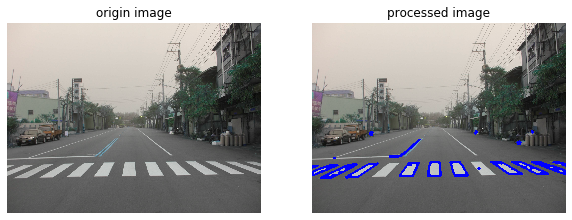

In [1798]:
import cv2
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
numbers = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
for number in range(101):
#for number in numbers: 
    #filename = ''testing/'+ str(number) + '.jpg'
    filename = number + '.jpg'
    img = cv2.imread(filename)
    show = img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    im = cv2.GaussianBlur(img,(7,7),0)

    low_threshold = 30
    high_threshold = 50
    edges = cv2.Canny(gray, low_threshold, high_threshold)
    median = cv2.medianBlur(edges, 3)
    avg = cv2.blur(median, (9,9))
    candidate = np.int16(edges) - np.int16(avg)
    candidate = cv2.threshold(candidate, 240, 255, cv2.THRESH_BINARY)[1]

    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    #img[dst>0.01*dst.max()]=[0,0,255]
    Y = np.array((130, 255, 255))
    Y = np.int16(Y)
    W = np.array((255, 255, 255))
    W = np.int16(W)
    dist1 = 0
    dist2 = 0
    d1 = []
    d2 = []
    using = []    # > np.percentile(dst, 50)
    x, y = np.where(dst > 9)
    for i in range(len(x)):
        if  candidate[x[i], y[i]] == 255:
            B = im[x[i], y[i], 0]
            G = im[x[i], y[i], 1]
            R = im[x[i], y[i], 2]
            color = np.array((B, G, R))
            dist1 = np.linalg.norm(Y-color)
            dist2 = np.linalg.norm(W-color)
            '''
            if x[i] > ceil(dst.shape[0]/2):
                dist1 /= 2
                dist2 /= 2      
            '''
            if (dist2 < 50) | (dist1 < 100):
                using.append((x[i], y[i]))
                d1.append(dist1)
                d2.append(dist2)

    if (len(d1) < 300) | (len(d2) < 300):
        #print('lack')
        dist1 = 0
        dist2 = 0
        d1 = []
        d2 = []
        using = []    # > np.percentile(dst, 50)
        x, y = np.where(dst > 9)
        for i in range(len(x)):
            if  candidate[x[i], y[i]] == 255:
                B = im[x[i], y[i], 0]
                G = im[x[i], y[i], 1]
                R = im[x[i], y[i], 2]
                color = np.array((B, G, R))
                dist1 = np.linalg.norm(Y-color)
                dist2 = np.linalg.norm(W-color)
                if x[i] > ceil(dst.shape[0]/2):
                    dist1 /= 2
                    dist2 /= 2     
                if (dist2 < 50) | (dist1 < 100):
                    using.append((x[i], y[i]))
                    d1.append(dist1)
                    d2.append(dist2)

    if sum(d1) > sum(d2):
        t = True
        col = d2
    else:
        t = False
        col = d1
    deleters = []
    for i in np.where(col > np.percentile(col, 30))[0]:
        deleters.append(using[i])

    #print((len(using), len(deleters)))

    for i in deleters:
        using.remove(i)    
    def direction(input, init):
        global boundary, initpt, dir, t
        t = []
        if dir:
            init = dir
        x, y = input
        if init%2 == 0:
            dir = (init + 7)%8
        else:
            dir = (init + 6)%8
        while len(t) < 8:
            if dir == 0:
                if homo((x, y), (x+1, y)) == True:
                    initpt = (x+1, y)
                    boundary.append((x+1, y))
                    break
                else:
                    #print((x, y), (x+1, y))
                    t.append(0)
                    dir = 1
            elif dir == 1:
                if homo((x, y), (x+1, y+1)) == True:
                    initpt = (x+1, y+1)
                    boundary.append((x+1, y+1)) 
                    break
                else:
                    #print((x, y), (x+1, y+1))
                    t.append(1)
                    dir = 2
            elif dir == 2:
                if homo((x, y), (x, y+1)) == True:
                    initpt = (x, y+1)
                    boundary.append((x, y+1))  
                    break
                else:
                    #print((x, y), (x, y+1))
                    t.append(2)
                    dir = 3       
            elif dir == 3:
                if homo((x, y), (x-1, y+1)) == True:
                    initpt = (x-1, y+1)
                    boundary.append((x-1, y+1))   
                    break
                else:
                    #print((x, y), (x-1, y+1))
                    t.append(3)
                    dir = 4
            elif dir == 4:
                if homo((x, y), (x-1, y)) == True:
                    initpt = (x-1, y)
                    boundary.append((x-1, y))
                    break
                else:
                    #print((x, y), (x-1, y))
                    t.append(4)
                    dir = 5
            elif dir == 5:
                if homo((x, y), (x-1, y-1)) == True:
                    initpt = (x-1, y-1)
                    boundary.append((x-1, y-1))
                    break
                else:
                    #print((x, y), (x-1, y-1))
                    t.append(5)
                    dir = 6
            elif dir == 6:
                if homo((x, y), (x, y-1)) == True:
                    initpt = (x, y-1)
                    boundary.append((x, y-1))
                    break
                else:
                    #print((x, y), (x, y-1))
                    t.append(6)
                    dir = 7  
            elif dir == 7:
                if homo((x, y), (x+1, y-1)) == True:
                    initpt = (x+1, y-1)
                    boundary.append((x+1, y-1))
                    break
                else:
                    #print((x, y), (x+1, y-1))
                    t.append(7)
                    dir = 0  


    def homo(p1, p2):
        x1, y1 = p1
        x2, y2 = p2
        if (x2 >= (gray.shape[0]-1)) | (y2 >= (gray.shape[1]-1)) | (x2 < 0) | (y2 < 0):
            return False
        else:
            B = im[x1, y1, 0]
            G = im[x1, y1, 1]
            R = im[x1, y1, 2]
            b = im[x2, y2, 0]
            g = im[x2, y2, 1]
            r = im[x2, y2, 2]
            c1 = np.array((B, G, R))
            c2 = np.array((b, g, r))
            c1 = np.int16(c1)
            c2 = np.int16(c2)
            dist = np.sum(c2-c1)
            if sum(d1) > sum(d2):
                d = np.linalg.norm(W - im[x2, y2, :])
            else:
                d = np.linalg.norm(Y - im[x2, y2, :])
            if (dist > -30) & (d < np.percentile(col, 90)):
                return True
            else:
                return False

    d1 = []; d2 = []
    for i in using:
        x, y = i
        B = im[x, y, 0]
        G = im[x, y, 1]
        R = im[x, y, 2]
        color = np.array((B, G, R))
        d1.append(np.linalg.norm(Y-color))
        d2.append(np.linalg.norm(W-color))

    if sum(d1) > sum(d2):
        col = d2
    else: 
        col = d1


    boundary = []
    d = 0
    t2 = using.copy()
    for i in range(len(using)): 
        initpt = using[i]
        d += 1
        tolerate = 0
        dir = 7
        while True:
            if initpt in t2:
                tolerate += 1
                if tolerate > 3:
                    break
                else:
                    direction(initpt, dir)
            else:
                t2.append(initpt)
                direction(initpt, dir)
    using = using + boundary
    using = (list(set(using)))
    '''
    deleters = []
    for i in range(len(using)):
        x, y = using[i]
        if  median[x, y] == 0:
            pass
        else:
            deleters.append(using[i])

    deleters = (list(set(deleters))) #unique

    for i in deleters:
        using.remove(i)
    '''
    for i in range(len(using)):
        x, y = using[i]
        cv2.circle(im, (y, x), 3, (0, 0, 255), -1)    

    median = cv2.medianBlur(im[:, :, 2], 13)

    x = np.where(median == 255)[0]
    y = np.where(median == 255)[1]

    b = im[x, y][:,0]
    g = im[x, y][:,1]
    r = im[x, y][:,2]
    Color = np.zeros(shape = im.shape)
    t = []
    for i in [b, g, r]:
        counts = np.bincount(i)
    #返回众数
        t.append(np.argmax(counts))
    Color[:,:,0] = t[0]
    Color[:,:,1] = t[1]
    Color[:,:,2] = t[2]
    a = np.int16(Color) - np.int16(im)
    x1 = []
    y1 = []
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if (np.abs(a[i, j, 0]) + np.abs(a[i, j, 1]) +np.abs(a[ i, j, 2])) < 4:
                x1.append(i)
                y1.append(j)
    x1 = np.array(x1)
    y1 = np.array(y1)
    x = np.append(x, x1)
    y = np.append(y, y1)

    for i in range(len(x)):
        cv2.circle(img, (y[i], x[i]), 1, (0, 0, 255), -1)
    #cv2.imwrite('outcome/' + str(number) + '.jpg', img)
    #cv2.imwrite('output/' + number + '.jpg', img)   
    cv2.imwrite('Y.jpg', img)
    plt.figure(num='final',figsize=(10,10))
    plt.subplot(1,2,1)     
    plt.title('origin image')
    plt.axis('off')
    plt.imshow(show)
    plt.subplot(1,2,2)     
    plt.title('processed image')
    plt.axis('off')
    plt.imshow(img)
    plt.show()

			**************************************
			**		Welcome to Use Spider		**
			**************************************


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: use options instead of chrome_options


0 ERROR!
0 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/0.jpg
url=

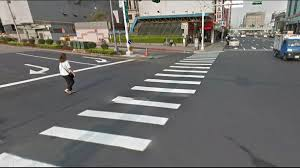

1 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/1.jpg
url=

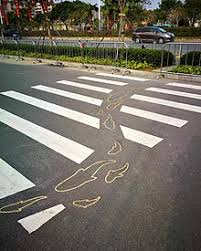

2 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/2.jpg
url=

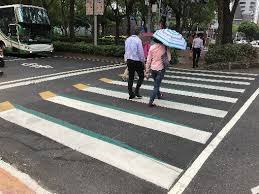

3 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/3.jpg
url=

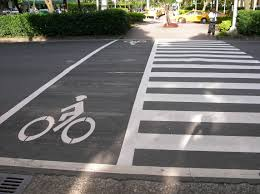

4 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/4.jpg
url=

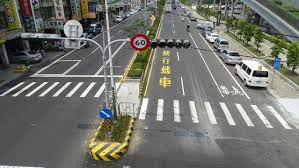

5 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/5.jpg
url=

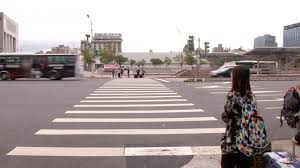

6 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/6.jpg
url=

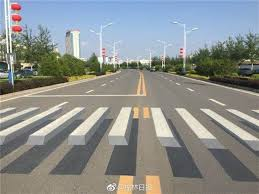

7 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/7.jpg
url=

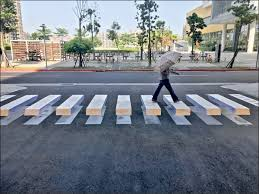

8 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/8.jpg
url=

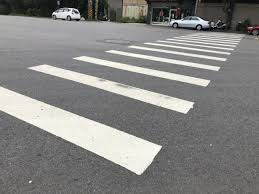

9 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/9.jpg
url=

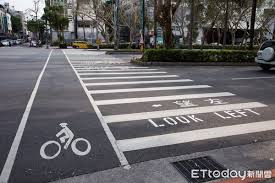

10 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/10.jpg
url=

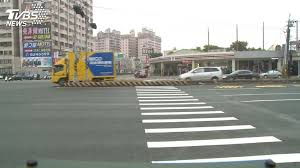

11 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/11.jpg
url=

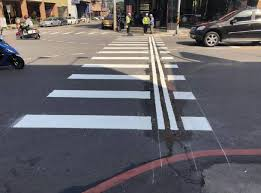

12 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/12.jpg
url=

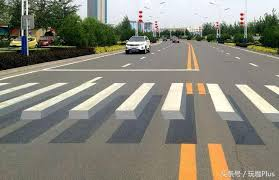

13 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/13.jpg
url=

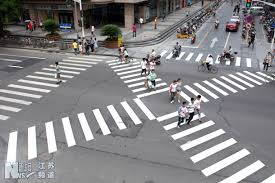

14 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/14.jpg
url=

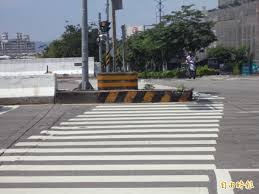

15 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/15.jpg
url=

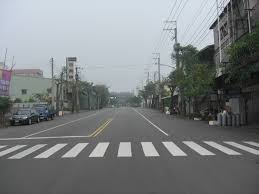

16 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/16.jpg
url=

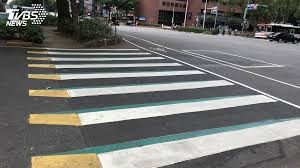

17 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/17.jpg
url=

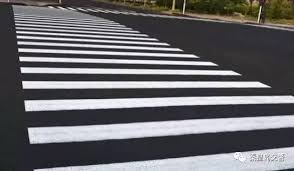

18 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/18.jpg
url=

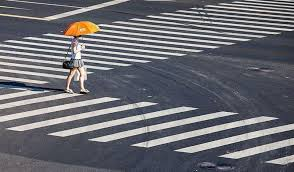

19 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/19.jpg
url=

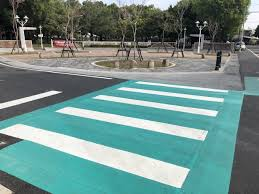

20 ERROR!
20 ERROR!
20 ERROR!
20 ERROR!
20 ERROR!
20 ERROR!
20 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/20.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFKsaPff8h9CMHiBJ6RkbVg0gzBGH9jwYbEC1XKg_ibkjE_B9BHw&s
21 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/21.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0UNphGYiFQ70NvRAflJEwYy1HVSFCFZexkggnoJ4OYNl36_gw&s
22 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/22.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRstbrETuF3yRA3dRsPZyC8QR00yfW2foOgCsQERFnTvlACSUeUaw&s
23 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/23.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTludFaGJwh5xFC7XPoaxkBpWa0P5PZL7v7Z5Vz1Q-ou0tHdig2&s
24 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/24.j

59 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/59.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHLyKJ-98EEr6KBECcql8QSb588QNG4CmfqSRnqfcP7hySAmo4KA&s
60 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/60.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSXUvuDNNAO3WnLHtGqGHPrGAsvNoFYNpqbCw6BFxl6uZf5BOQF&s
61 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/61.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0X3MKZxavuwFPU8lBTgq4Q2zy4mvrmg-i3jbEPA5KfYORB1HPlQ&s
62 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/62.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWqH35_lDD3sDTBZDOAN6fqWfSf4p07RCUS0kpe6TbF0F8u8yO&s
63 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/63.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9G

90 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/90.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcREsxxRjkhxYrmmjL6LOa6x3MnXPg603iJVP7xuU6s7aT_h1s24&s
91 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/91.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMAdMN21P6gH-IOXpz7zhG6_dRYdL48Z4ElVBlt9-ltNBBTzKpmw&s
92 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/92.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTpmnNTM5tYva3POIW-N_WrZfFfMMuJnq1_4Im76Ev7LeXnlBBpJA&s
93 ERROR!
93 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/93.jpg
url=https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5hN-vFoWEwUnSWAJ5X9Qy3eItkx_q7vFXeW9I8MZdxghOr_WN&s
94 Downloading image to location: /Users/wangshunda/Desktop/高等影像處理/斑馬線辨識/testing/2019-12-30/94.jpg
url=https://encrypted-tbn0.gstatic.com/images?q

In [787]:
from selenium import webdriver 
from selenium.webdriver.chrome.options import Options
import time  
import urllib.request
from bs4 import BeautifulSoup as bs
import re  
import os  
#****************************************************
base_url_part1 = 'https://www.google.com/search?q='
base_url_part2 = '&source=lnms&tbm=isch' # base_url_part1以及base_url_part2都是固定不变的，无需更改
search_query = '斑馬線' # 检索的关键词，可自己输入你想检索的关键字
location_driver = 'chromedriver' # Chrome驱动程序在电脑中的位置
 
class Crawler:
    def __init__(self):
        self.url = base_url_part1 + search_query + base_url_part2
 
    # 启动Chrome浏览器驱动
    def start_brower(self):
        chrome_options = Options()
        chrome_options.add_argument("--disable-infobars")
        # 启动Chrome浏览器  
        driver = webdriver.Chrome(executable_path=location_driver, chrome_options=chrome_options)  
        # 最大化窗口，因为每一次爬取只能看到视窗内的图片
        driver.maximize_window()  
        # 浏览器打开爬取页面  
        driver.get(self.url)  
        return driver
 
    def downloadImg(self, driver):  
        global imglist
        t = time.localtime(time.time())
        foldername = str(t.__getattribute__("tm_year")) + "-" + str(t.__getattribute__("tm_mon")) + "-" + \
                     str(t.__getattribute__("tm_mday")) # 定义文件夹的名字
        picpath = 'testing/%s' %(foldername) # 下载到的本地目录 
        # 路径不存在时创建一个
        if not os.path.exists(picpath): os.makedirs(picpath)
        # 下载图片的本地路径 /home/LQ/ImageDownload/xxx
 
        # 记录下载过的图片地址，避免重复下载  
        img_url_dic = {} 
        x = 0  
        # 当鼠标的位置小于最后的鼠标位置时,循环执行
        pos = 0     
        for i in range(5, 10, 1): # 此处可自己设置爬取范围
            pos = i * 500 # 每次下滚500  
            js = "document.documentElement.scrollTop=%d" %pos     
            driver.execute_script(js)  
            time.sleep(1)
            # 获取页面源码
            html_page = driver.page_source
            # 利用Beautifulsoup4创建soup对象并进行页面解析
            soup = bs(html_page, "html.parser")
            # 通过soup对象中的findAll函数图像信息提取
            imglist = soup.findAll('img', {'class':'rg_ic rg_i'})
 
            # ??这段代码问题?
            for imgurl in imglist:
                try:
                    print(x, end=' ')
                    if imgurl['src'] not in img_url_dic:
                        target = '{}/{}.jpg'.format(picpath, x)
                        print ('Downloading image to location: ' + target + '\nurl=' + imgurl['src'])
                        img_url_dic[imgurl['src']] = '' 
                        urllib.request.urlretrieve(imgurl['src'], target)
                        time.sleep(1)
                        x += 1  
                except KeyError:
                    print("ERROR!")
                    continue
 
    def run(self):
        print('\t\t\t**************************************\n\t\t\t**\t\tWelcome to Use Spider\t\t**\n\t\t\t**************************************')  
        driver=self.start_brower()
        self.downloadImg(driver)
        driver.close()
        print("Download has finished.")
 
 
if __name__ == '__main__':  
    craw = Crawler() 
    craw.run()

